# **Aplikasi Rekomendasi Produk Anak Berdasarkan Usia**

Proyek ini berupa sistem rekomendasi produk makanan berdasarkan usia anak. 
Dataset bersumber dari hasil *web scrapping* dari beberapa website yang menjual produk makanan anak dengan rincian sebagai berikut :

1. produk-href : Link URL produk 
2. product_name : Nama produk 
3. price : Informasi harga produk 
4. description : Deskripsi mengenai produk
5. manfaat : manfaat produk 
6. usia : usia anak
7. picture_src : Link URL gambar produk
8. tipe_produk : Jenis produk 

# Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.express as px
import seaborn as sns
import missingno as mno
from sklearn.feature_extraction.text import TfidfVectorizer

# Data Load

In [2]:
# Import the Dataset 

from google.colab import files
uploaded = files.upload()

Saving datasets.csv to datasets.csv


**Preliminary Exploration**

In [3]:
df = pd.read_csv('datasets.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   produk-href      56 non-null     object
 1   produk_name      56 non-null     object
 2   price            56 non-null     object
 3   description      56 non-null     object
 4   usia             56 non-null     object
 5   brand            56 non-null     object
 6   picture_src-src  56 non-null     object
 7   category         56 non-null     object
 8   tipe_produk      56 non-null     object
 9   manfaat          56 non-null     object
dtypes: object(10)
memory usage: 4.5+ KB


,produk-href,produk_name,price,description,usia,brand,picture_src-src,category,tipe_produk,manfaat
0,https://babyzania.com/beli-popok/ivenet-grain-...,Ivenet Grain Friend Biscuit Snack Bayi 40gr - ...,Rp 29.500,Ivenet Grain Biscuit Snack Bayi adalah makanan...,"infant, toddler, kids",Ivenet,https://assets.babyzania.com/image/cache/catal...,makanan,snack,"energi, protein"
1,https://babyzania.com/beli-popok/ivenet-grain-...,Ivenet Grain Friend Biscuit Snack Bayi 40gr - ...,Rp 29.500,Ivenet Grain Biscuit Snack Bayi adalah makanan...,"infant, toddler, kids",Ivenet,https://assets.babyzania.com/image/cache/catal...,makanan,snack,mpasi
2,https://babyzania.com/beli-popok/ivenet-grain-...,Ivenet Grain Friend Biscuit Snack Bayi 40gr - ...,Rp 29.500,Ivenet Grain Biscuit Snack Bayi adalah makanan...,"infant, toddler, kids",Ivenet,https://assets.babyzania.com/image/cache/catal...,makanan,snack,mpasi
3,https://babyzania.com/beli-popok/ivenet-grain-...,Ivenet Grain Friend Biscuit Snack Bayi 40gr - ...,Rp 29.500,Ivenet Grain Biscuit Snack Bayi adalah makanan...,"infant, toddler, kids",Ivenet,https://assets.babyzania.com/image/cache/catal...,makanan,snack,mpasi
4,https://babyzania.com/beli-makanan-susu/sun-bi...,Sun Marie Susu Snack Biskuit Bayi - 80 gr,Rp 8.300,Biskuit Marie Susu yang dibuat khusus untuk ad...,"infant, toddler, kids",SUN,https://assets.babyzania.com/image/cache/catal...,makanan,snack,mpasi


# Data Exploration 

In [4]:
# Let's look at the unique classes in data
df['manfaat'].unique()

array(['energi, protein', 'mpasi'], dtype=object)

In [5]:
# Looking at number of classes 
df['manfaat'].nunique()

2

In [6]:
categorical_features = ['manfaat', 'usia', 'tipe_produk']

(array([], dtype=float64), <a list of 0 Text major ticklabel objects>)

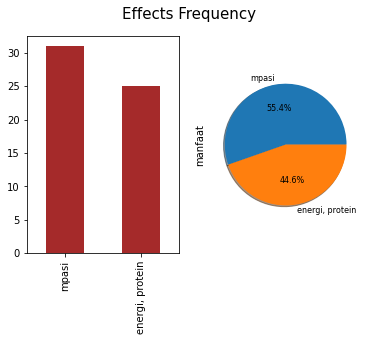

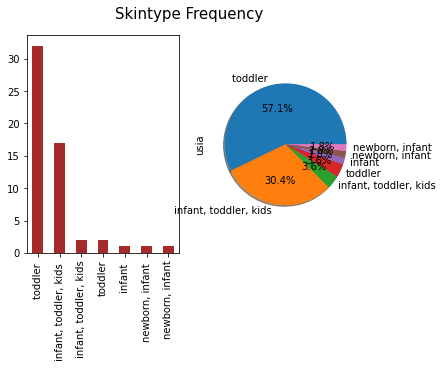

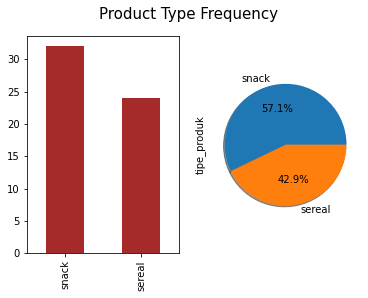

In [7]:
#Plotting Categorical Variables

fig, ax = plt.subplots(1, 2)
df["manfaat"].value_counts().plot.bar(color="brown", ax=ax[0])
df["manfaat"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 8},ax=ax[1])
fig.suptitle("Effects Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
df["usia"].value_counts().plot.bar(color="brown", ax=ax[0])
df["usia"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Skintype Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

fig, ax = plt.subplots(1, 2)
df["tipe_produk"].value_counts().plot.bar(color="brown", ax=ax[0])
df["tipe_produk"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Product Type Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)

In [8]:
df['manfaat']=df['manfaat'].astype('category')
df['labels']=df['manfaat'].cat.codes
df.head()

,produk-href,produk_name,price,description,usia,brand,picture_src-src,category,tipe_produk,manfaat,labels
0,https://babyzania.com/beli-popok/ivenet-grain-...,Ivenet Grain Friend Biscuit Snack Bayi 40gr - ...,Rp 29.500,Ivenet Grain Biscuit Snack Bayi adalah makanan...,"infant, toddler, kids",Ivenet,https://assets.babyzania.com/image/cache/catal...,makanan,snack,"energi, protein",0
1,https://babyzania.com/beli-popok/ivenet-grain-...,Ivenet Grain Friend Biscuit Snack Bayi 40gr - ...,Rp 29.500,Ivenet Grain Biscuit Snack Bayi adalah makanan...,"infant, toddler, kids",Ivenet,https://assets.babyzania.com/image/cache/catal...,makanan,snack,mpasi,1
2,https://babyzania.com/beli-popok/ivenet-grain-...,Ivenet Grain Friend Biscuit Snack Bayi 40gr - ...,Rp 29.500,Ivenet Grain Biscuit Snack Bayi adalah makanan...,"infant, toddler, kids",Ivenet,https://assets.babyzania.com/image/cache/catal...,makanan,snack,mpasi,1
3,https://babyzania.com/beli-popok/ivenet-grain-...,Ivenet Grain Friend Biscuit Snack Bayi 40gr - ...,Rp 29.500,Ivenet Grain Biscuit Snack Bayi adalah makanan...,"infant, toddler, kids",Ivenet,https://assets.babyzania.com/image/cache/catal...,makanan,snack,mpasi,1
4,https://babyzania.com/beli-makanan-susu/sun-bi...,Sun Marie Susu Snack Biskuit Bayi - 80 gr,Rp 8.300,Biskuit Marie Susu yang dibuat khusus untuk ad...,"infant, toddler, kids",SUN,https://assets.babyzania.com/image/cache/catal...,makanan,snack,mpasi,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


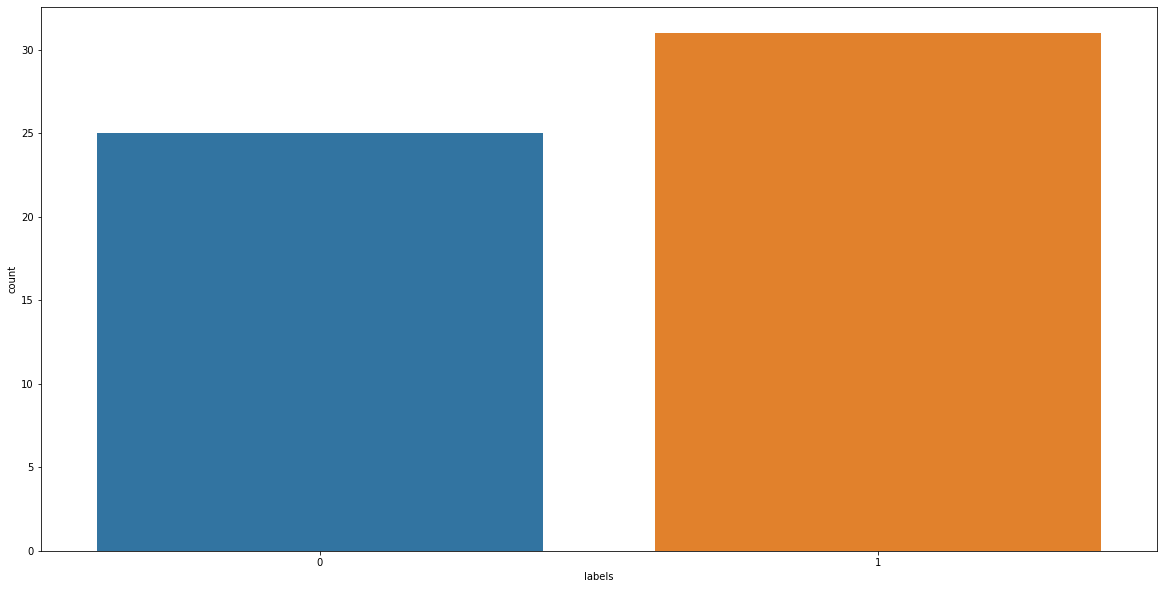

In [9]:
# Looking at the label distribution
plt.figure(figsize=(20,10))
sns.countplot(df['labels'])

In [10]:
# Checking data balancing 

auto_balancing = pd.DataFrame()
auto_balancing["Count"] = df["usia"].value_counts()
auto_balancing["Count%"] = df["usia"].value_counts()/df.shape[0]*100

auto_balancing

,Count,Count%
toddler,32,57.142857
"infant, toddler, kids",17,30.357143
"infant, toddler, kids",2,3.571429
toddler,2,3.571429
infant,1,1.785714
"newborn, infant",1,1.785714
"newborn, infant",1,1.785714


In [11]:
# Checking data balancing (for classification)

auto_balancing = pd.DataFrame()
auto_balancing["Count"] = df["tipe_produk"].value_counts()
auto_balancing["Count%"] = df["tipe_produk"].value_counts()/df.shape[0]*100

auto_balancing

,Count,Count%
snack,32,57.142857
sereal,24,42.857143


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


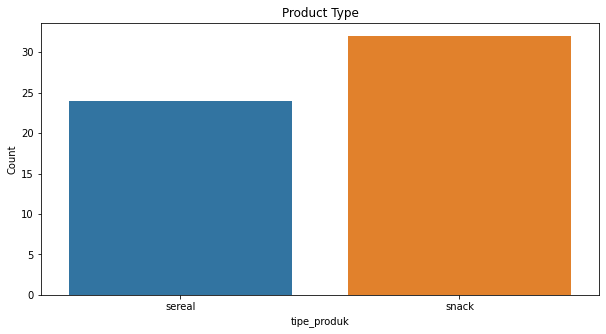

In [12]:
plt.subplots(figsize=(10,5))
sns.countplot(df['tipe_produk'].sort_values())
plt.xlabel('tipe_produk')
plt.ylabel('Count')
plt.title('Product Type')

plt.show()

In [13]:
# Checking null value 

df.isnull().sum()

produk-href        0
produk_name        0
price              0
description        0
usia               0
brand              0
picture_src-src    0
category           0
tipe_produk        0
manfaat            0
labels             0
dtype: int64

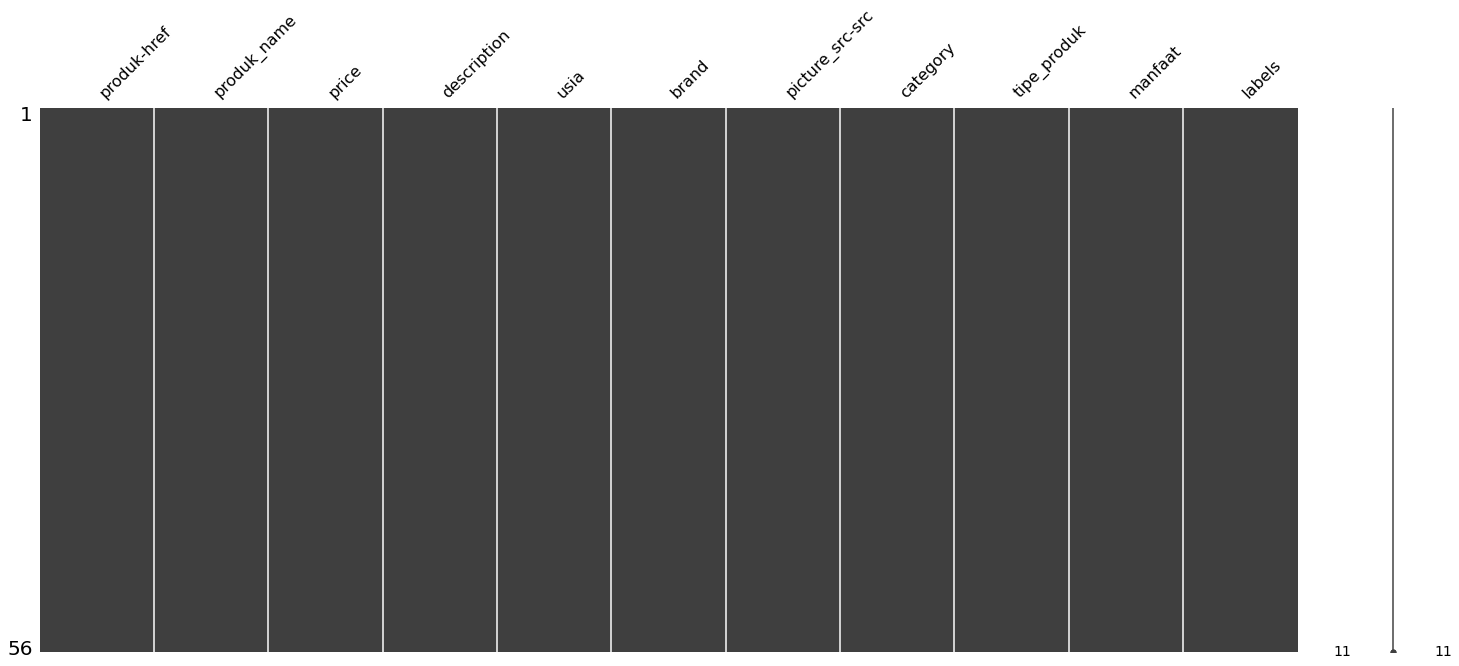

In [14]:
# Visualize the missing values in the dataframe

mno.matrix(df)

In [15]:
# Checking the existence of duplicated rows

df.duplicated().sum()

0

# Modelling

### TF-IDF Vectorizer

TF-IDF Vectorizer akan digunakan pada sistem rekomendasi untuk menemukan representasi fitur penting dari setiap kategori notable_effects. Kita akan menggunakan fungsi tfidfvectorizer() dari library sklearn.

In [19]:
## MODELLING with Content Based Filtering
# Initializing TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data 'manfaat'
tf.fit(df['manfaat']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names()

['energi', 'mpasi', 'protein']

In [20]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(df['manfaat']) 
 
# Melihat ukuran matrix tfidf
shape = tfidf_matrix.shape
shape

(56, 3)

In [21]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.70710678, 0.        , 0.70710678],
        [0.        , 1.        , 0.        ],
        [0.        , 1.        , 0.        ],
        [0.        , 1.        , 0.        ],
        [0.        , 1.        , 0.        ],
        [0.70710678, 0.        , 0.70710678],
        [0.70710678, 0.        , 0.70710678],
        [0.70710678, 0.        , 0.70710678],
        [0.        , 1.        , 0.        ],
        [0.        , 1.        , 0.        ],
        [0.        , 1.        , 0.        ],
        [0.70710678, 0.        , 0.70710678],
        [0.        , 1.        , 0.        ],
        [0.70710678, 0.        , 0.70710678],
        [0.70710678, 0.        , 0.70710678],
        [0.70710678, 0.        , 0.70710678],
        [0.70710678, 0.        , 0.70710678],
        [0.70710678, 0.        , 0.70710678],
        [0.70710678, 0.        , 0.70710678],
        [0.70710678, 0.        , 0.70710678],
        [0.        , 1.        , 0.        ],
        [0.        , 1.        , 0

In [23]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan nama produk
# Baris diisi dengan manfaaat produk
 
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=df.produk_name
).sample(shape[1], axis=1).sample(10, axis=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,energi,protein,mpasi
produk_name,,,
Ivenet Springkling Recipe Seaweed Laver Rumput Laut Tabur - 30gr,0.000000,0.000000,1.0
Gerber Baby Cereal 1st Food Bubur Bayi 227 gr - Rice,0.707107,0.707107,0.0
Organic Center Kars Granola Choco Lover Cemilan Diet Cereal - 350gr,0.707107,0.707107,0.0
Gerber Organic Cereal 1st Food Bubur Bayi 227 gr - Oatmeal / Rice,0.707107,0.707107,0.0
Promina Baby Crunchies Keju Cheddar Snack Bayi - 20gr,0.000000,0.000000,1.0
Promina Silky Pudding Puding Bayi 100gr - Strawberry/ Cokelat,0.000000,0.000000,1.0
Gerber Cereal 2nd Food Banana Cereal Bayi 227 gr - Rice / Oatmeal,0.707107,0.707107,0.0
Ivenet Grain Friend Biscuit Snack Bayi 40gr - Strawberry,0.707107,0.707107,0.0
OMO Sweet Bites Snack Sehat Bayi - 15 gr,0.000000,0.000000,1.0


### Cosine Similarity

In [24]:
# Menghitung cosine similarity pada matrix tf-idf
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 0., 1., 1.],
       [0., 1., 1., ..., 0., 1., 1.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 0., 1., 1.],
       [0., 1., 1., ..., 0., 1., 1.]])

In [25]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama produk
cosine_sim_df = pd.DataFrame(cosine_sim, index=df['produk_name'], columns=df['produk_name'])
 
# Melihat similarity matrix pada setiap produk
cosine_sim_df.sample(7, axis=1).sample(10, axis=0)

produk_name,Promina Sup Mi Ayam dan Sayur 12m+ - 81 gr,Happy Tummy Puff Stick Snack Bayi / Anak 15 gr - Cheese / Sweet Corn,Ivenet Grain Friend Biscuit Snack Bayi 40gr - Sweet Potato,Promina Bubur Tim Ayam Kampung Tomat Wotel 8m+ - 100gr,Promina Puffs Sweet Potato 8m+ - 15gr,Yummy Bites Star Shaped Pasta MPASI Bayi - 250gr,Gerber Baby Cereal 1st Food Bubur Bayi 227 gr - Rice
produk_name,,,,,,,
OMO Unicorn Roll Baby Snack Sehat Bayi No MSG 18 gr - Beli 2 Gratis 1,0.0,1.0,1.0,0.0,1.0,0.0,0.0
Alamii Puff Snack Anak Cemilan Bayi Sehat No MSG,0.0,1.0,1.0,0.0,1.0,0.0,0.0
Ivenet Springkling Recipe Seaweed Laver Rumput Laut Tabur - 30gr,0.0,1.0,1.0,0.0,1.0,0.0,0.0
Promina Bubur Tim Ayam Kampung Kacang Polong 8 M+ - 100 gr,1.0,0.0,0.0,1.0,0.0,1.0,1.0
Ivenet Grain Friend Biscuit Snack Bayi 40gr - Cheese,0.0,1.0,1.0,0.0,1.0,0.0,0.0
Ivenet Roasted Sweet Potato Puree Bubur Bayi 90 gr,0.0,1.0,1.0,0.0,1.0,0.0,0.0
Yummy Bites Star Shaped Pasta MPASI Bayi - 250gr,0.0,1.0,1.0,0.0,1.0,0.0,0.0
Yummy Bites Cereal Sereal MPASI Bayi 200 gr - Wheat Milk Dates,1.0,0.0,0.0,1.0,0.0,1.0,1.0
Yummy Bites Yogurt Melt 20gr - Mixed Berries,0.0,1.0,1.0,0.0,1.0,0.0,0.0


### Getting Recommendation

In [26]:
def df_recommendations(nama, similarity_data=cosine_sim_df, items=df[['produk_name', 'manfaat']], k=5):
    
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop nama agar nama produk yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [27]:
df[df.produk_name.eq('Ivenet Grain Friend Biscuit Snack Bayi 40gr - Blueberry')].head()

,produk-href,produk_name,price,description,usia,brand,picture_src-src,category,tipe_produk,manfaat,labels
1,https://babyzania.com/beli-popok/ivenet-grain-...,Ivenet Grain Friend Biscuit Snack Bayi 40gr - ...,Rp 29.500,Ivenet Grain Biscuit Snack Bayi adalah makanan...,"infant, toddler, kids",Ivenet,https://assets.babyzania.com/image/cache/catal...,makanan,snack,mpasi,1


In [28]:
# Mendapatkan rekomendasi produk Ivenet Grain Friend Biscuit Snack Bayi 40gr - Blueberry
df_recommendations("Ivenet Grain Friend Biscuit Snack Bayi 40gr - Blueberry")

,produk_name,manfaat
0,OMO Unicorn Roll Baby Snack Sehat Bayi No MSG ...,mpasi
1,Yummy Bites Yogurt Melt 20gr - Gold Kiwi,mpasi
2,Yummy Bites Yogurt Melt 20gr - Mixed Berries,mpasi
3,Yummy Bites Yogurt Melt 20gr - Strawberry,mpasi
4,Promina Puffs Sweet Potato 8m+ - 15gr,mpasi
